## Supermarket Sales - Visualización y Análisis en Jupyter Notebook

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 1. Cargar y explorar el dataset

In [3]:
# Cargar el dataset
df = pd.read_csv("data.csv")
df['Date'] = pd.to_datetime(df['Date'])

# Información general del dataset
print(df.info())
print(df.describe())
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

### 2. Selección de variables relevantes

In [4]:
relevant_columns = ['Date', 'Total', 'Product line', 'Customer type', 'Payment',
                    'cogs', 'gross income', 'Rating', 'Branch', 'Unit price', 'Quantity']
df = df[relevant_columns]

### 3. Análisis Visual

#### 3.1 Evolución de las Ventas Totales

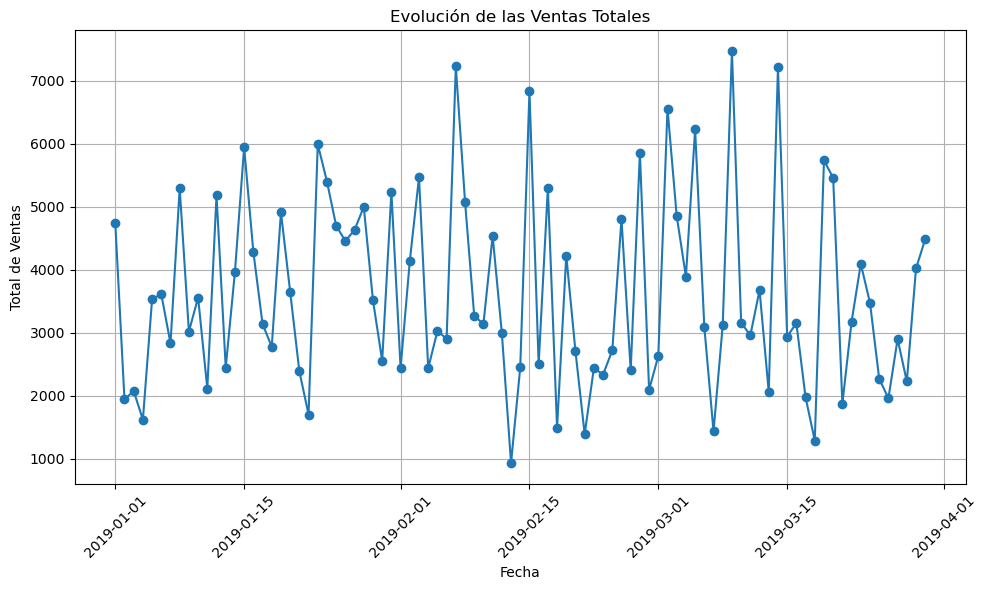

In [5]:
daily_sales = df.groupby('Date')['Total'].sum().reset_index()
plt.figure(figsize=(10,6))
plt.plot(daily_sales['Date'], daily_sales['Total'], marker='o')
plt.title('Evolución de las Ventas Totales')
plt.xlabel('Fecha')
plt.ylabel('Total de Ventas')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 3.2 Ingresos por Línea de Producto

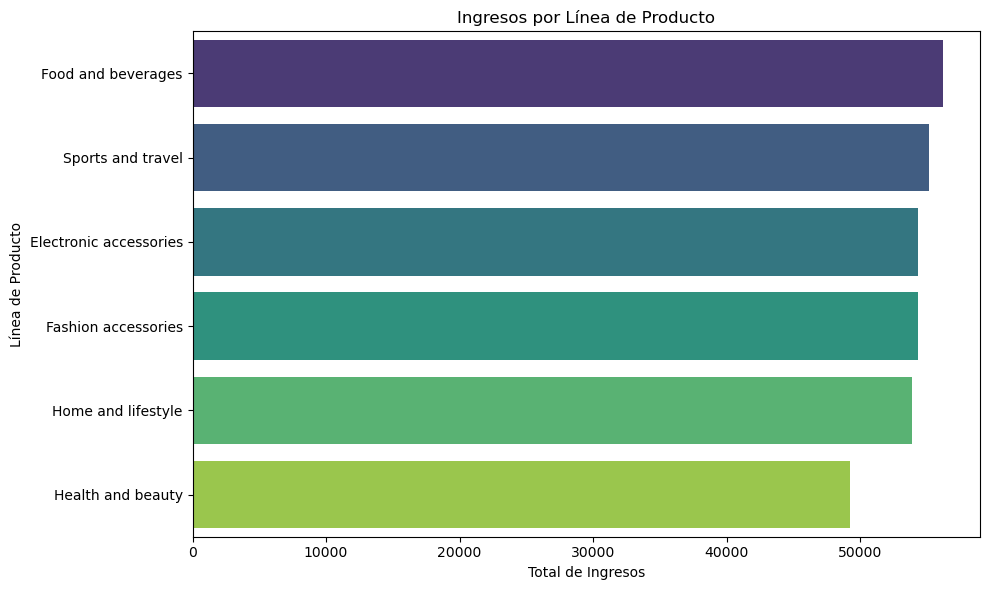

In [6]:
income_by_product = df.groupby('Product line')['Total'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=income_by_product, x='Total', y='Product line', palette='viridis')
plt.title('Ingresos por Línea de Producto')
plt.xlabel('Total de Ingresos')
plt.ylabel('Línea de Producto')
plt.tight_layout()
plt.show()

#### 3.3 Distribución de Calificaciones

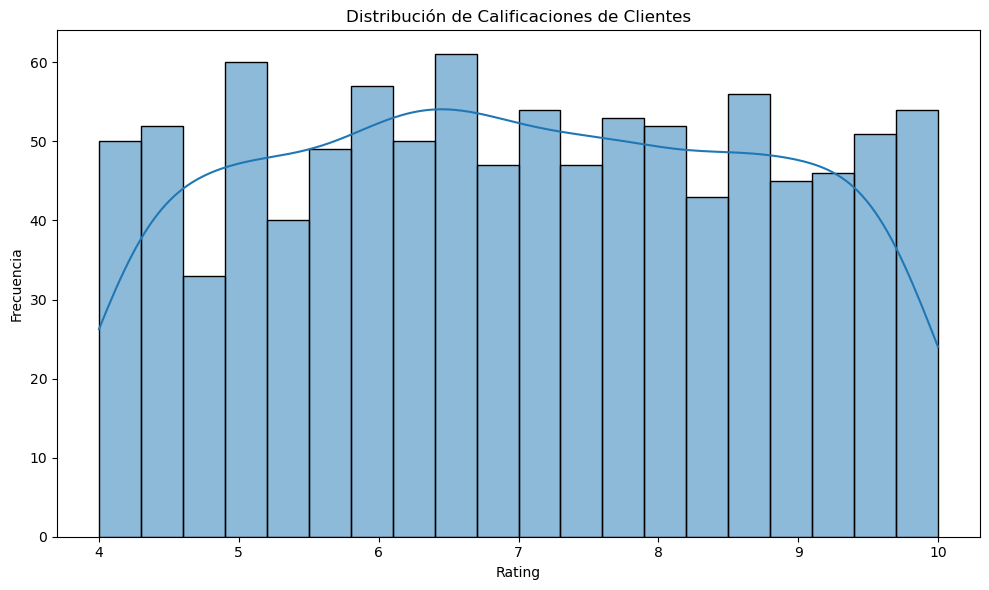

In [45]:
plt.figure(figsize=(10,6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribución de Calificaciones de Clientes')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

#### 3.4 Comparación de Gasto por Tipo de Cliente

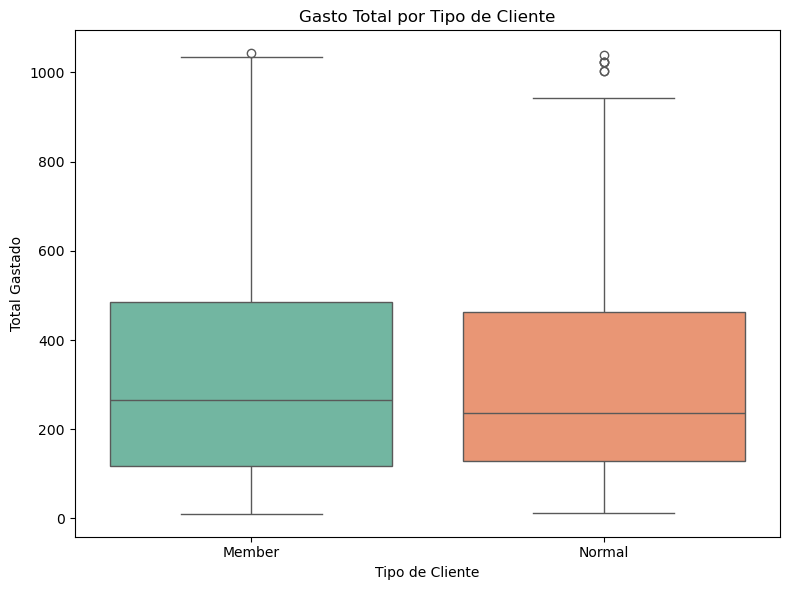

In [46]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Customer type', y='Total', palette='Set2')
plt.title('Gasto Total por Tipo de Cliente')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Total Gastado')
plt.tight_layout()
plt.show()

#### 3.5 Relación entre Costo y Ganancia Bruta

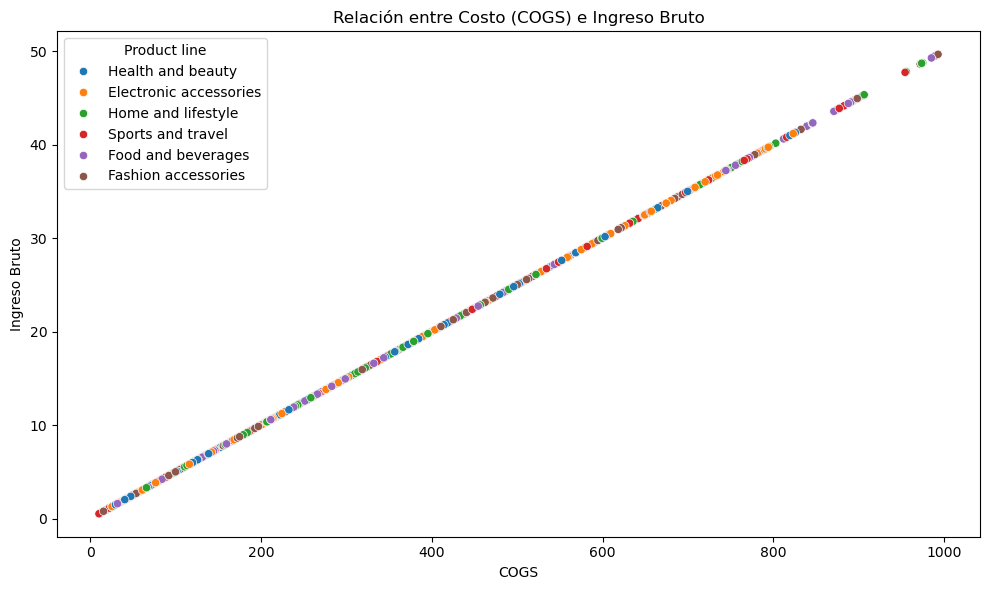

In [47]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='cogs', y='gross income', hue='Product line')
plt.title('Relación entre Costo (COGS) e Ingreso Bruto')
plt.xlabel('COGS')
plt.ylabel('Ingreso Bruto')
plt.tight_layout()
plt.show()

#### 3.6 Métodos de Pago Preferidos

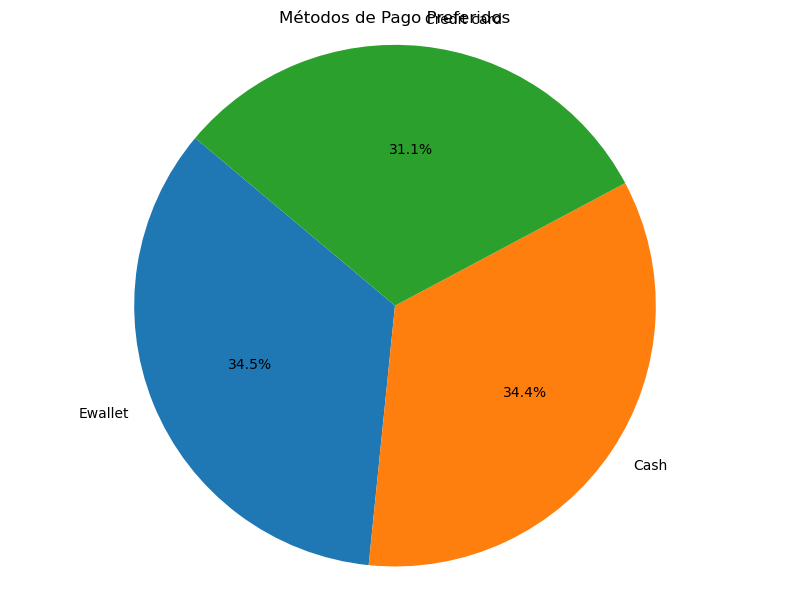

In [48]:
payment_counts = df['Payment'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Métodos de Pago Preferidos')
plt.axis('equal')
plt.tight_layout()
plt.show()

#### 3.7 Análisis de Correlación Numérica

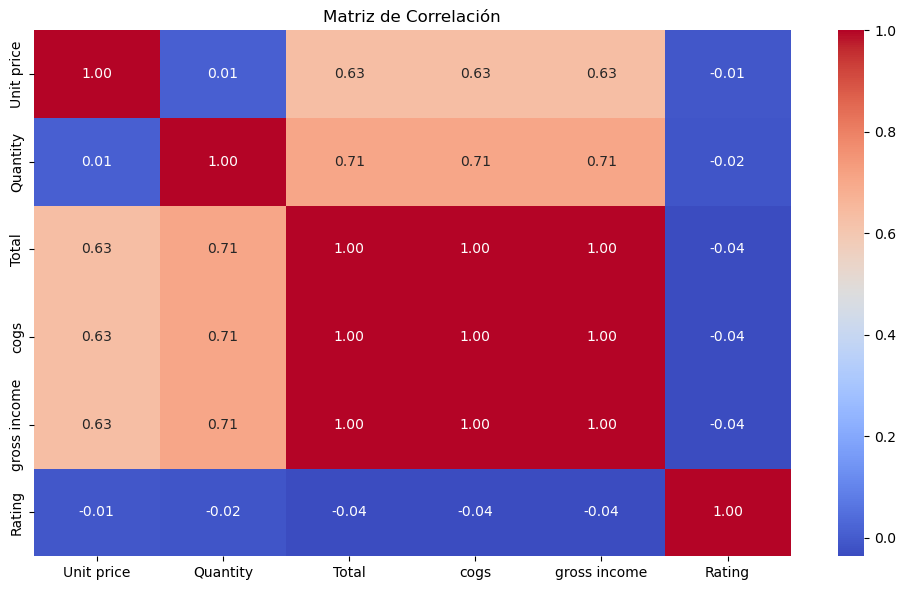

In [49]:
num_df = df[['Unit price', 'Quantity', 'Total', 'cogs', 'gross income', 'Rating']]
correlation = num_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

#### 3.8 Composición del Ingreso Bruto por Sucursal y Línea de Producto

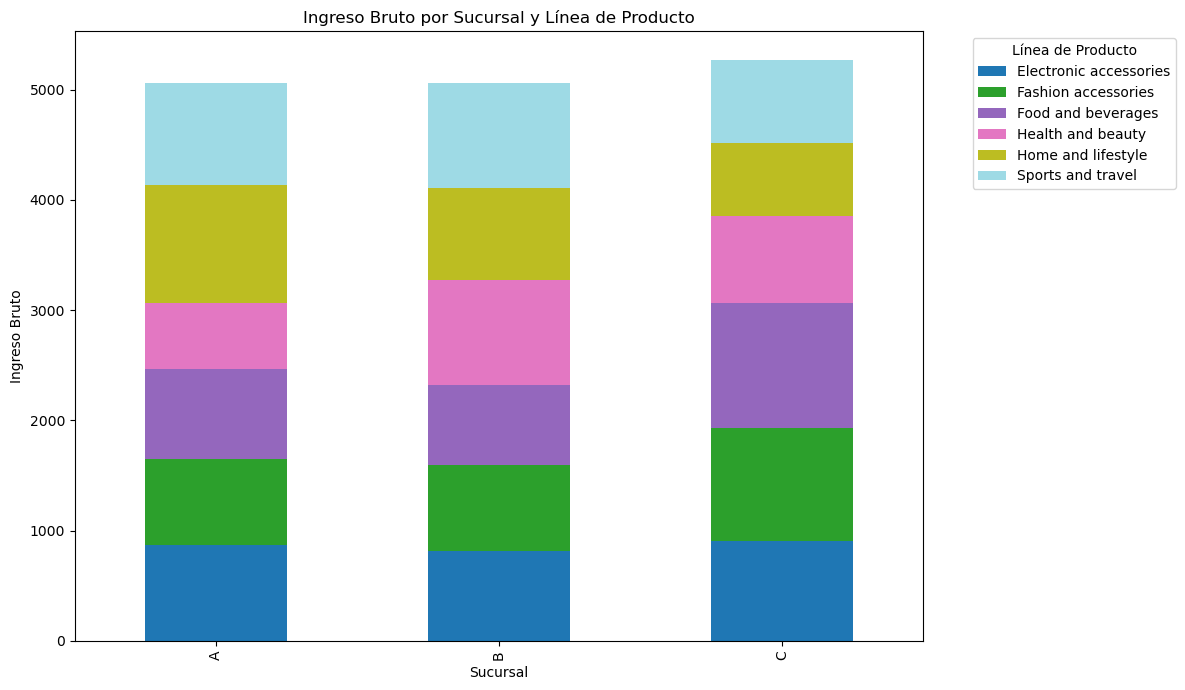

In [50]:
composition = df.groupby(['Branch', 'Product line'])['gross income'].sum().unstack()
composition.plot(kind='bar', stacked=True, figsize=(12,7), colormap='tab20')
plt.title('Ingreso Bruto por Sucursal y Línea de Producto')
plt.xlabel('Sucursal')
plt.ylabel('Ingreso Bruto')
plt.legend(title='Línea de Producto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 4. 🚀 Reflexión final sobre el Despliegue

Las visualizaciones permiten comprender patrones de comportamiento de clientes, productos rentables,
diferencias geográficas entre sucursales y preferencias en métodos de pago. 

Se recomienda usar estos hallazgos para personalizar estrategias de marketing y promociones, 
así como para tomar decisiones más informadas en la gestión de productos y fidelización de clientes.

Durante el proceso de despliegue en Streamlit Cloud fue en general fluido y amigable. Streamlit proporciona una experiencia muy directa al integrarse con GitHub, lo que permite desplegar el dashboard casi de forma automática una vez que el repositorio está configurado correctamente.

Los desafíos encontrados incluyeron:
- Asegurar que todos los archivos necesarios estuvieran correctamente cargados en el repositorio (especialmente `data.csv` y `requirements.txt`).
- Algunos ajustes menores en el código para asegurar compatibilidad con la nube, como el uso de rutas relativas y evitar rutas absolutas del sistema local.
- Verificar que el formato de fecha en `data.csv` fuera compatible con `pd.to_datetime()` en el entorno de Streamlit Cloud.

Esta experiencia refuerza la importancia de mantener un entorno de desarrollo limpio, replicable y bien documentado para facilitar el despliegue en servicios cloud. Además, demuestra lo rápido que se puede pasar de un desarrollo local a una visualización accesible públicamente.

## 📍 Enlace al Dashboard Desplegado

Puedes acceder al dashboard desplegado públicamente en el siguiente enlace:

🔗 [https://descboard.streamlit.app/]


